In [2]:
import pandas as pd
import numpy as np

from glob import glob

import cv2
import matplotlib.pylab as plt

plt.style.use('ggplot')

In [3]:
photo_files = glob('MLPhotos/*.jpg')

In [4]:
len(photo_files)

3

In [5]:
img_mpl = plt.imread(photo_files[2])
img_cv2 = cv2.imread(photo_files[2])
cato_mpl = plt.imread(photo_files[0])
man_mpl = plt.imread(photo_files[1])
img_mpl.shape, img_cv2.shape

((259, 194, 3), (259, 194, 3))

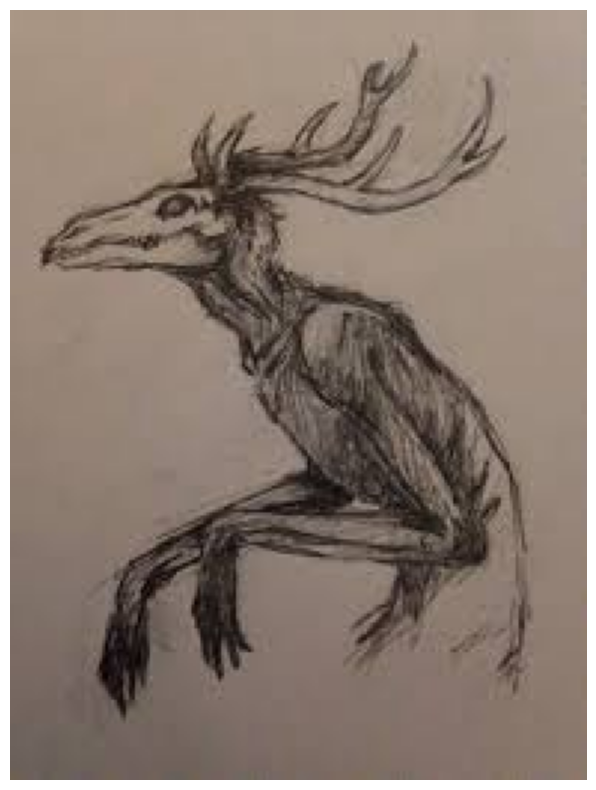

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img_mpl)
ax.axis('off')
plt.show()

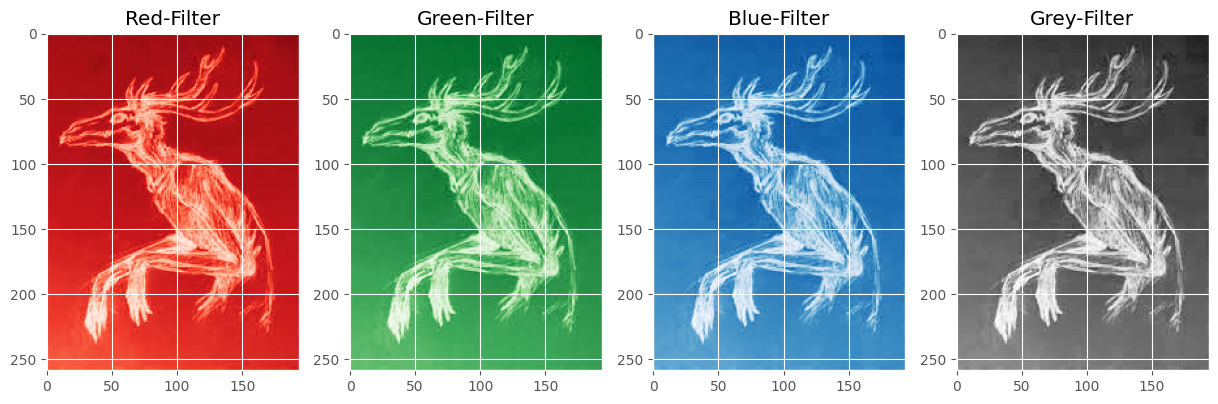

In [7]:
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
axs[0].imshow(img_mpl[:,:,0], cmap='Reds')
axs[1].imshow(img_mpl[:,:,1], cmap='Greens')
axs[2].imshow(img_mpl[:,:,2], cmap='Blues')
axs[3].imshow(img_mpl[:,:,2], cmap='Greys')
axs[0].set_title('Red-Filter')
axs[1].set_title('Green-Filter')
axs[2].set_title('Blue-Filter')
axs[3].set_title('Grey-Filter')
plt.show()

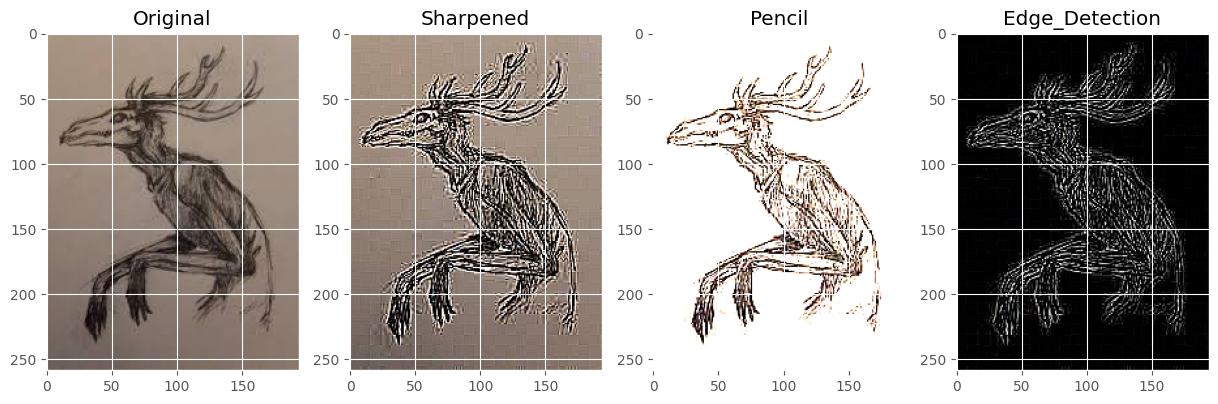

In [8]:
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1,9,-1], 
                              [-1,-1,-1]])

pencil = np.array([[-1,-1,-1], 
                  [-1,11,-1], 
                  [-1,-1,-1]])

edge_detection = np.array([[-1,-1,-1], 
                          [-1,8,-1], 
                          [-1,-1,-1]])

fig, axs = plt.subplots(1, 4, figsize=(15, 5))
axs[0].imshow(img_mpl)
axs[1].imshow(cv2.filter2D(img_mpl, -1, kernel_sharpening))
axs[2].imshow(cv2.filter2D(img_mpl, -1, pencil))
axs[3].imshow(cv2.filter2D(img_mpl, -1, edge_detection))
Daxs[0].set_title('Original')
axs[1].set_title('Sharpened')
axs[2].set_title('Pencil')
axs[3].set_title('Edge_Detection')
plt.show()

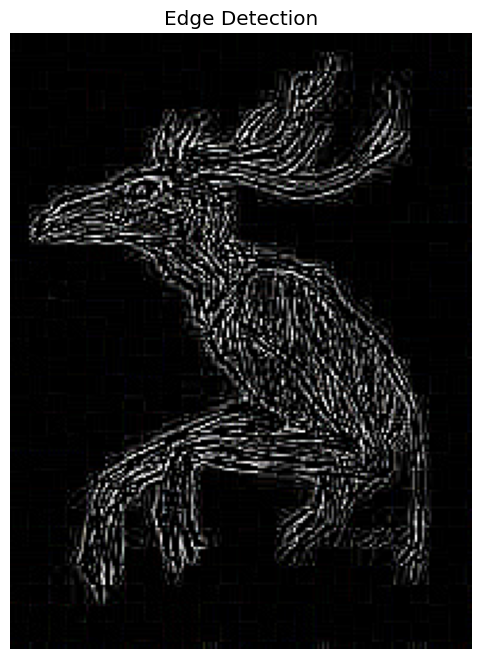

In [118]:
# Sharpen Image
edge_detection = np.array([[-1,-1,-1], 
                        [-1,8,-1], 
                        [-1,-1,-1]])

img_edgeNorm = cv2.filter2D(img_mpl, -1, edge_detection) #MADE NEW IMAGE NAMED pencil

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_edgeNorm)
ax.axis('off')
ax.set_title('Edge Detection')
plt.show()

# As you can see, sometimes Edge Detection does not work well completely on its own...

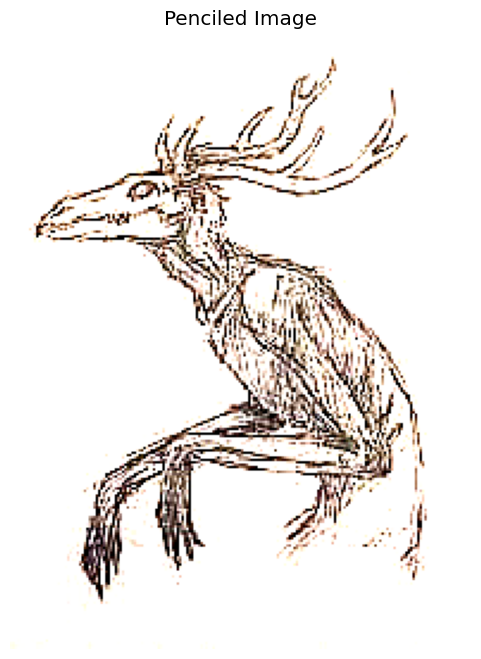

In [101]:
# Sharpen Image
pencil = np.array([[-1,-1,-1], 
                              [-1,11,-1], 
                              [-1,-1,-1]])

img_pencil = cv2.filter2D(img_mpl, -1, pencil) #MADE NEW IMAGE NAMED pencil

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_pencil)
ax.axis('off')
ax.set_title('Penciled Image')
plt.show()

# Now to combine these effects: Using Grey-shift AFTER the pencil-filter to achieve Edge-Detection!

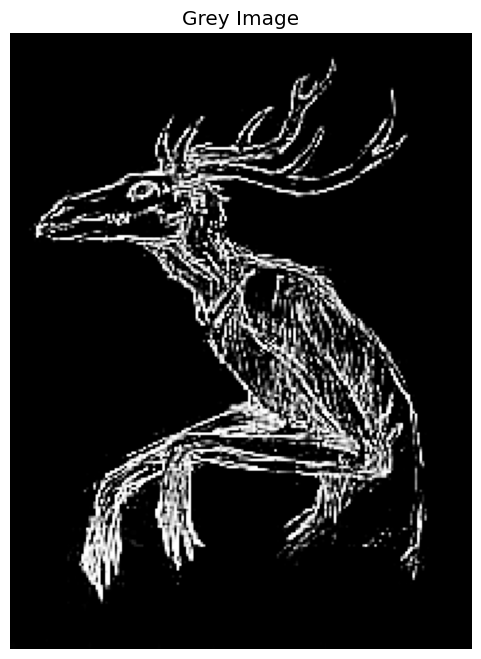

In [112]:
img_gray = cv2.cvtColor(img_pencil, cv2.COLOR_RGB2GRAY)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_gray, cmap='Greys')
ax.axis('off')
ax.set_title('Grey Image')
plt.show()

# Stark contrast between normal Edge-Detection and processed Edge-Detection

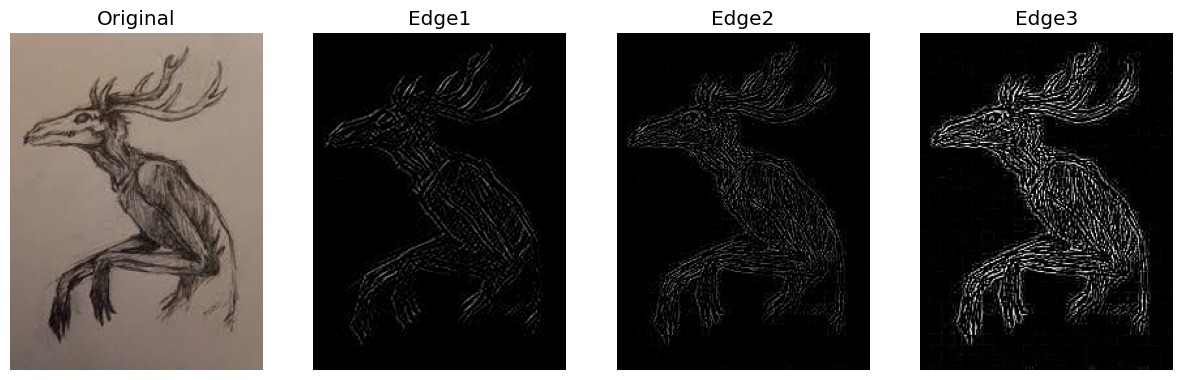

In [139]:
sharp1 = np.array([[1,0,-1], 
                    [0,0,0], 
                    [-1,0,1]])

sharp2 = np.array([[0,-1,0], 
                  [-1,4,-1], 
                  [0,-1,0]])

sharp3 = np.array([[-1,-1,-1], 
                    [-1,8,-1], 
                    [-1,-1,-1]])

fig, axs = plt.subplots(1, 4, figsize=(15, 5))
axs[0].imshow(img_mpl)
axs[1].imshow(cv2.filter2D(img_mpl, -1, sharp1))
axs[2].imshow(cv2.filter2D(img_mpl, -1, sharp2))
axs[3].imshow(cv2.filter2D(img_mpl, -1, sharp3))
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[3].axis('off')
axs[0].set_title('Original')
axs[1].set_title('Edge1')
axs[2].set_title('Edge2')
axs[3].set_title('Edge3')
plt.show()

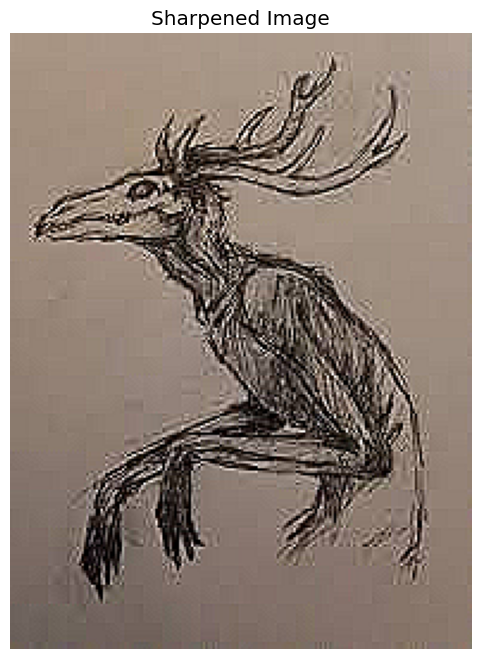

In [136]:
# Sharpen Image
kernel_sharpening = np.array([[0,-1,0], 
                              [-1,5,-1], 
                              [0,-1,0]])

sharpened = cv2.filter2D(img_mpl, -1, kernel_sharpening) #MADE NEW IMAGE NAMED sharpened

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(sharpened)
ax.axis('off')
ax.set_title('Sharpened Image')
plt.show()

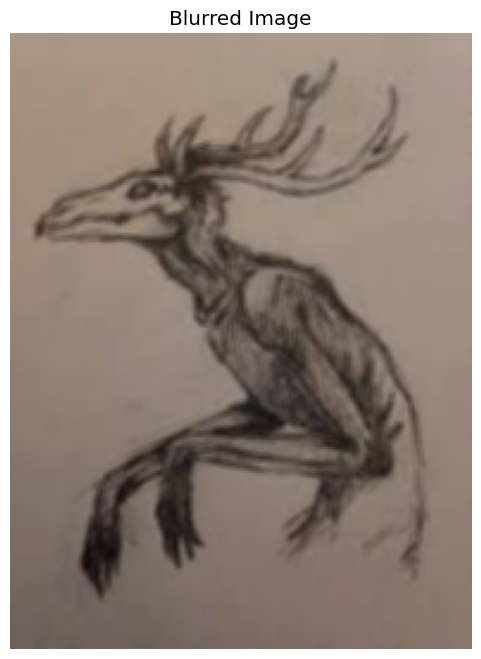

In [44]:
# Blurring the image
kernel_3x3 = np.ones((3, 3), np.float32) / 9
blurred = cv2.filter2D(img_mpl, -1, kernel_3x3)  #MADE NEW IMAGE NAMED blurred
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(blurred)
ax.axis('off')
ax.set_title('Blurred Image')
plt.show()

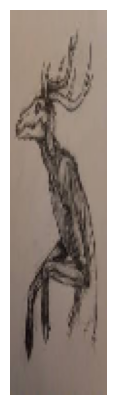

In [146]:
# Different Size
img_resize = cv2.resize(img_mpl, (50, 200))
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(img_resize)
ax.axis('off')
plt.show()

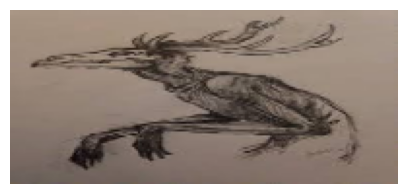

In [148]:
# Different Size
img_resize = cv2.resize(img_mpl, (200, 90))
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(img_resize)
ax.axis('off')
plt.show()

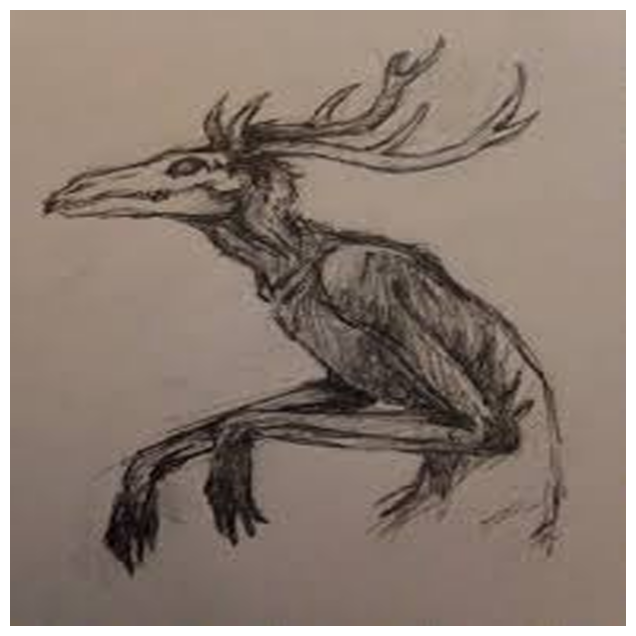

In [149]:
img_resize = cv2.resize(img_mpl, (5000, 5000), interpolation = cv2.INTER_CUBIC)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_resize)
ax.axis('off')
plt.show()